In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.metrics import log_loss

In [19]:
train = pd.read_csv("train.csv.zip")
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [21]:
train.duplicated().sum()

2323

In [22]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [23]:
train.drop_duplicates(subset=None, keep="first", inplace=True)

In [8]:
train['Category'].value_counts()

LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUNAWAY     

Text(0.5, 1.0, 'Crime counts')

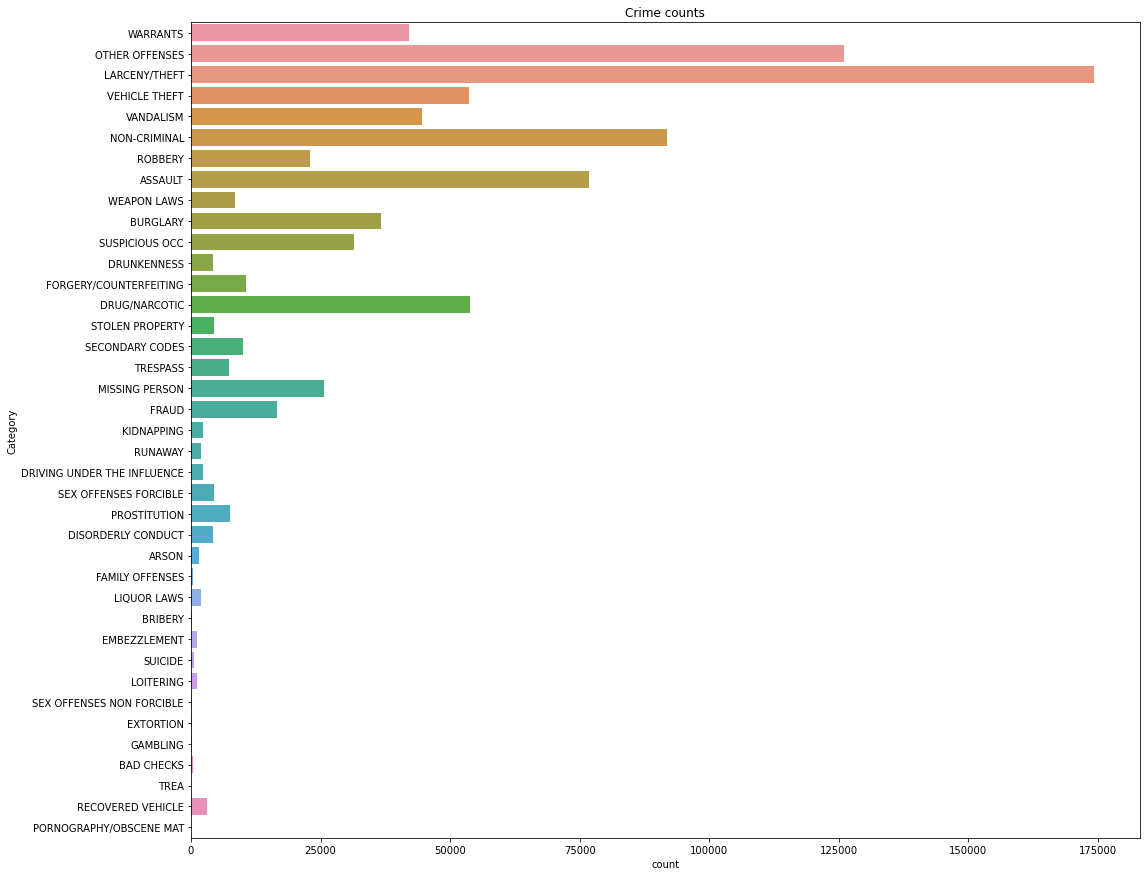

In [24]:
fig, count = plt.subplots(figsize = (17,15))
count = sns.countplot(y = train['Category'])
count.set_title('Crime counts')

In [10]:
category_freq = pd.DataFrame(train['Category'].value_counts(normalize=True))
category_freq.reset_index(inplace=True)
category_freq.rename({'index': 'Category', 'Category': 'Frequency'}, axis='columns', inplace=True)
category_freq['Cumulative_Frequency'] = category_freq['Frequency'].cumsum()
category_freq

,Category,Frequency,Cumulative_Frequency
0,LARCENY/THEFT,0.199058,0.199058
1,OTHER OFFENSES,0.143835,0.342893
2,NON-CRIMINAL,0.104959,0.447851
3,ASSAULT,0.087716,0.535567
4,DRUG/NARCOTIC,0.061571,0.597138
5,VEHICLE THEFT,0.061327,0.658465
6,VANDALISM,0.050907,0.709373
7,WARRANTS,0.048126,0.757498
8,BURGLARY,0.041794,0.799292
9,SUSPICIOUS OCC,0.035849,0.835141


In [11]:
candidate_classes = list(category_freq.loc[category_freq['Cumulative_Frequency'] < 0.8, 'Category'])
candidate_classes

['LARCENY/THEFT',
 'OTHER OFFENSES',
 'NON-CRIMINAL',
 'ASSAULT',
 'DRUG/NARCOTIC',
 'VEHICLE THEFT',
 'VANDALISM',
 'WARRANTS',
 'BURGLARY']

In [12]:
train_reduced_categories = train.loc[train['Category'].isin(candidate_classes)]
train_reduced_categories

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564
878043,2003-01-06 00:20:00,OTHER OFFENSES,PAROLE VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266


Text(0.5, 1.0, 'Most common types of crimes')

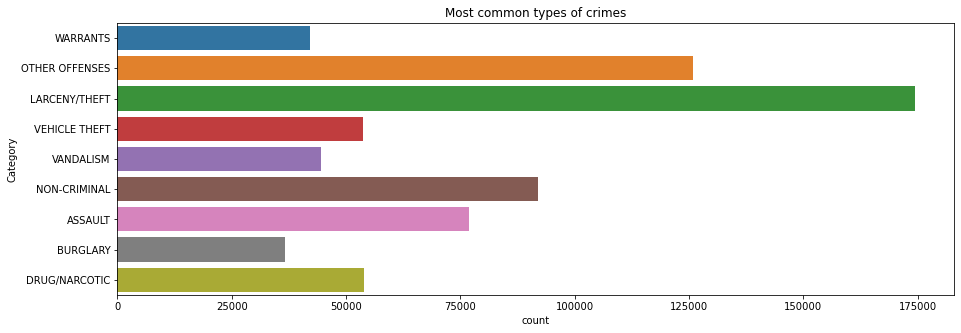

In [14]:
fig, count = plt.subplots(figsize = (15,5))
count = sns.countplot(y = train_reduced_categories['Category'])
count.set_title('Most common types of crimes')

In [13]:
warrants = train_reduced_categories.loc[train_reduced_categories['Category'] == 'WARRANTS']
warrants

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
22,2015-05-13 21:11:00,WARRANTS,WARRANT ARREST,Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556
66,2015-05-13 19:11:00,WARRANTS,ENROUTE TO PAROLE OFFICER,Wednesday,TENDERLOIN,NONE,400 Block of HYDE ST,-122.416236,37.784913
67,2015-05-13 19:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,TENDERLOIN,NONE,400 Block of HYDE ST,-122.416236,37.784913
75,2015-05-13 18:58:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,MISSION,NONE,1900 Block of MISSION ST,-122.419677,37.765851
...,...,...,...,...,...,...,...,...,...
877968,2003-01-06 08:45:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Monday,SOUTHERN,"ARREST, BOOKED",0 Block of UNITED NATIONS PZ,-122.414318,37.779944
877995,2003-01-06 07:08:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Monday,MISSION,"ARREST, BOOKED",3000 Block of 16TH ST,-122.421663,37.764876
878026,2003-01-06 02:06:00,WARRANTS,WARRANT ARREST,Monday,BAYVIEW,"ARREST, BOOKED",NEWHALL ST / GALVEZ AV,-122.387710,37.740674
878027,2003-01-06 02:00:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Monday,SOUTHERN,"ARREST, BOOKED",900 Block of MARKET ST,-122.409708,37.782828


In [14]:
warrants['Descript'].value_counts()

WARRANT ARREST                          23702
ENROUTE TO OUTSIDE JURISDICTION         11456
ENROUTE TO DEPARTMENT OF CORRECTIONS     3245
ENROUTE TO PAROLE OFFICER                2149
ENROUTE TO ADULT AUTHORITY                884
ENROUTE TO PROBATION OFFICER              207
PROBATION SEARCH                          207
ENROUTE TO U.S. MARSHALL                  178
POST RELEASE COMMUNITY SUPERVISION         83
PAROLE SEARCH                              34
Name: Descript, dtype: int64

Text(0.5, 1.0, 'Warrant Descriptions Counts')

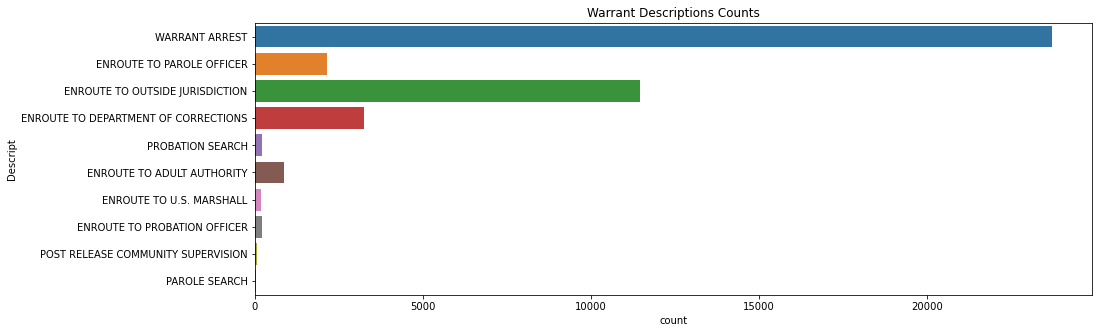

In [15]:
fig, count = plt.subplots(figsize = (15,5))
count = sns.countplot(y = warrants['Descript'])
count.set_title('Warrant Descriptions Counts')

In [16]:
others = train_reduced_categories.loc[train_reduced_categories['Category'] == 'OTHER OFFENSES']
others

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
11,2015-05-13 22:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,NONE,0 Block of ESCOLTA WY,-122.487983,37.737667
18,2015-05-13 21:40:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,BAYVIEW,"ARREST, BOOKED",MENDELL ST / HUDSON AV,-122.386401,37.738983
29,2015-05-13 20:56:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,NONE,2000 Block of 41ST AV,-122.499787,37.748518
...,...,...,...,...,...,...,...,...,...
878029,2003-01-06 01:54:00,OTHER OFFENSES,PROBATION VIOLATION,Monday,TENDERLOIN,"ARREST, BOOKED",1400 Block of GOLDEN GATE AV,-122.434423,37.779193
878032,2003-01-06 01:36:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,NORTHERN,"ARREST, CITED",GEARY BL / FRANKLIN ST,-122.423031,37.785482
878039,2003-01-06 00:40:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,NORTHERN,"ARREST, CITED",POLK ST / CALIFORNIA ST,-122.420692,37.790577
878041,2003-01-06 00:31:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,RICHMOND,"ARREST, CITED",CLEMENT ST / 14TH AV,-122.472985,37.782552


In [17]:
others['Descript'].unique()

array(['TRAFFIC VIOLATION ARREST', 'MISCELLANEOUS INVESTIGATION',
       'TRAFFIC VIOLATION', 'PROBATION VIOLATION',
       'STAY AWAY ORDER VIOLATION, DV RELATED',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED', 'RESISTING ARREST',
       'LOST/STOLEN LICENSE PLATE',
       'FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR PROPERTY',
       'RECKLESS DRIVING', 'VIOLATION OF RESTRAINING ORDER',
       'VIOLATION OF MUNICIPAL CODE', 'PAROLE VIOLATION',
       'HARASSING PHONE CALLS', 'INCIDENT ON SCHOOL GROUNDS',
       'VIOLATION OF PARK CODE', 'POSSESSION OF BURGLARY TOOLS W/PRIORS',
       'CONSPIRACY',
       'RESTRAINING ORDER NOTIFICATION/SERVICE OF RESTRAINING ORDER',
       'TAMPERING WITH A VEHICLE', 'VIOLATION OF MUNICIPAL POLICE CODE',
       'FALSE PERSONATION', 'POSSESSION OF BURGLARY TOOLS',
       'FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY',
       'TRAFFIC COLLISION, HIT & RUN, INJURY', 'OBSCENE PHONE CALLS(S)',
       'EVADING A POLICE OFFICER RECKLESSLY', 'DEFRAUDING 

In [18]:
larceny_theft = train_reduced_categories.loc[train_reduced_categories['Category'] == 'LARCENY/THEFT']
larceny_theft

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802
...,...,...,...,...,...,...,...,...,...
878002,2003-01-06 06:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / HARRISON ST,-122.401846,37.779032
878023,2003-01-06 02:15:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Monday,TENDERLOIN,NONE,600 Block of ELLIS ST,-122.416894,37.784286
878036,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948


In [19]:
larceny_theft['Descript'].unique()

array(['GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'PETTY THEFT FROM LOCKED AUTO',
       'ATTEMPTED THEFT FROM LOCKED VEHICLE', 'PETTY THEFT SHOPLIFTING',
       'GRAND THEFT FROM PERSON', 'PETTY THEFT FROM A BUILDING',
       'GRAND THEFT OF PROPERTY', 'GRAND THEFT FROM A BUILDING',
       'PETTY THEFT OF PROPERTY', 'GRAND THEFT SHOPLIFTING',
       'THEFT OF ANIMALS (GENERAL)', 'PETTY THEFT BICYCLE',
       'GRAND THEFT BICYCLE', 'ATTEMPTED THEFT OF A BICYCLE',
       'ATTEMPTED GRAND THEFT PURSESNATCH',
       'THEFT OF COMPUTERS OR CELL PHONES', 'GRAND THEFT PICKPOCKET',
       'PETTY THEFT FROM UNLOCKED AUTO', 'THEFT FROM MERCHANT OR LIBRARY',
       'ATTEMPTED THEFT FROM A BUILDING',
       'THEFT OF CHECKS OR CREDIT CARDS', 'ATTEMPTED SHOPLIFTING',
       'LOST PROPERTY, PETTY THEFT',
       'ATTEMPTED THEFT FROM UNLOCKED VEHICLE',
       'THEFT, GRAND, OF FIREARM', 'GRAND THEFT AUTO STRIP',
       'ATTEMPTED GRAND THEFT FROM PERSON', 'THEFT, DRUNK 

In [20]:
vehicle_theft = train_reduced_categories.loc[train_reduced_categories['Category'] == 'VEHICLE THEFT']
vehicle_theft

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
46,2015-05-13 20:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Wednesday,INGLESIDE,NONE,0 Block of CRESCENT AV,-122.423702,37.735233
59,2015-05-13 19:28:00,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Wednesday,CENTRAL,NONE,0 Block of SANSOME ST,-122.400720,37.790712
60,2015-05-13 19:28:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,CENTRAL,NONE,0 Block of SANSOME ST,-122.400720,37.790712
...,...,...,...,...,...,...,...,...,...
877980,2003-01-06 08:13:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Monday,TARAVAL,"ARREST, CITED",JUNIPERO SERRA BL / HOLLOWAY AV,-122.472322,37.721622
877994,2003-01-06 07:20:00,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Monday,INGLESIDE,NONE,400 Block of BENTON AV,-122.418502,37.733945
877999,2003-01-06 06:30:00,VEHICLE THEFT,STOLEN TRUCK,Monday,BAYVIEW,NONE,1400 Block of EGBERT AV,-122.393819,37.723277
878000,2003-01-06 06:30:00,VEHICLE THEFT,"VEHICLE, RECOVERED, OTHER VEHICLE",Monday,BAYVIEW,NONE,1400 Block of EGBERT AV,-122.393819,37.723277


In [21]:
vehicle_theft['Descript'].value_counts()

STOLEN AUTOMOBILE                                  26866
STOLEN TRUCK                                        8578
VEHICLE, RECOVERED, AUTO                            8017
VEHICLE, RECOVERED, OTHER VEHICLE                   2576
STOLEN MOTORCYCLE                                   2320
STOLEN AND RECOVERED VEHICLE                        2257
RECOVERED VEHICLE - STOLEN OUTSIDE SF               1613
ATTEMPTED STOLEN VEHICLE                             503
VEHICLE, RECOVERED, MOTORCYCLE                       411
TAMPERING WITH A VEHICLE                             232
STOLEN MISCELLANEOUS VEHICLE                         162
STOLEN TRAILER                                        52
AUTO, GRAND THEFT OF                                  48
VEHICLE, RECOVERED, CAMPER-HOUSE CAR-MOTOR HOME       45
VEHICLE, RECOVERED, MOBILE HOME-TRAILER                9
STOLEN BUS                                             8
VEHICLE, RENTAL, FAILURE TO RETURN                     7
VEHICLE, RECOVERED, BUS        

Text(0.5, 1.0, 'Vehicle Theft Descriptions Count')

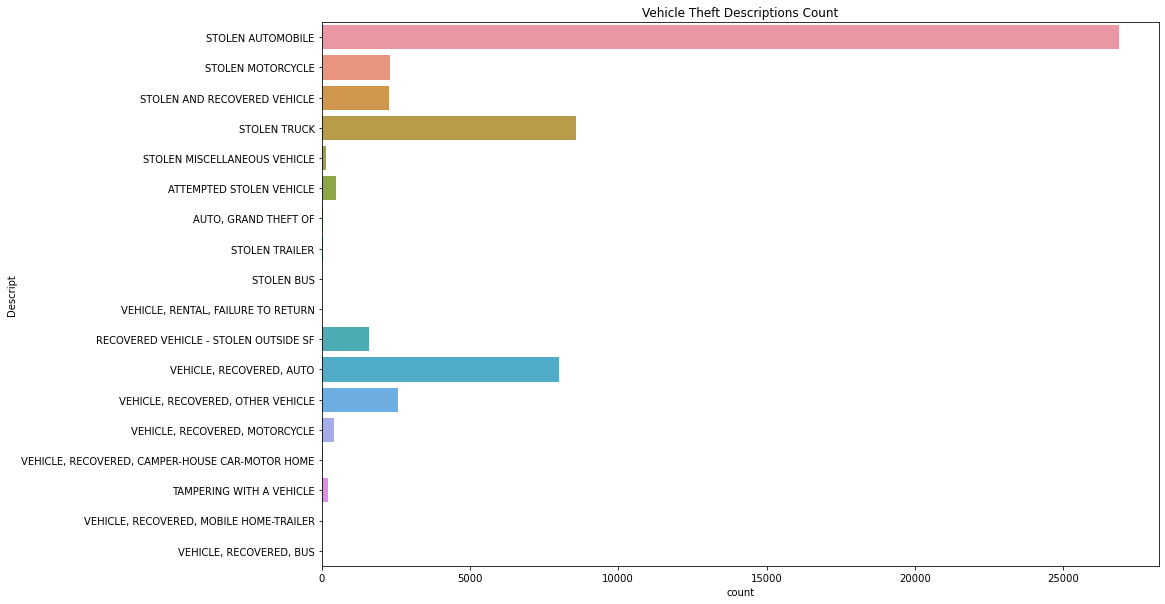

In [22]:
fig, count = plt.subplots(figsize = (15,10))
count = sns.countplot(y = vehicle_theft['Descript'])
count.set_title('Vehicle Theft Descriptions Count')

In [23]:
vandalism = train_reduced_categories.loc[train_reduced_categories['Category'] == 'VANDALISM']
vandalism

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
12,2015-05-13 22:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Wednesday,TENDERLOIN,NONE,TURK ST / JONES ST,-122.412414,37.783004
32,2015-05-13 20:45:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,NORTHERN,NONE,1500 Block of FILLMORE ST,-122.432744,37.783842
34,2015-05-13 20:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,NORTHERN,NONE,1600 Block of WEBSTER ST,-122.431310,37.785871
39,2015-05-13 20:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,INGLESIDE,NONE,0 Block of WINDING WY,-122.432446,37.710833
126,2015-05-13 17:07:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,NORTHERN,NONE,1100 Block of FILLMORE ST,-122.431980,37.780048
...,...,...,...,...,...,...,...,...,...
878016,2003-01-06 03:15:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,BAYVIEW,NONE,23RD ST / WISCONSIN ST,-122.398696,37.754746
878021,2003-01-06 02:24:00,VANDALISM,MALICIOUS MISCHIEF,Monday,NORTHERN,NOT PROSECUTED,SANCHEZ ST / 14TH ST,-122.431191,37.767595
878033,2003-01-06 01:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Monday,RICHMOND,"ARREST, CITED",1000 Block of 22ND AV,-122.391668,37.757793
878037,2003-01-06 00:55:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030


In [24]:
vandalism['Descript'].value_counts()

MALICIOUS MISCHIEF, VANDALISM OF VEHICLES                   17717
MALICIOUS MISCHIEF, VANDALISM                               15918
MALICIOUS MISCHIEF, BREAKING WINDOWS                         4970
MALICIOUS MISCHIEF, GRAFFITI                                 3749
MALICIOUS MISCHIEF                                            475
MALICIOUS MISCHIEF, TIRE SLASHING                             300
MALICIOUS MISCHIEF, STREET CARS/BUSES                         273
VANDALISM OR GRAFFITI TOOLS, POSSESSION                       268
MALICIOUS MISCHIEF, BREAKING WINDOWS WITH BB GUN              260
MALICIOUS MISCHIEF, ADULT SUSPECT                             231
MALICIOUS MISCHIEF, JUVENILE SUSPECT                           86
GRAFFITI ON GOVERNMENT VEHICLES OR PUBLIC TRANSPORTATION       58
MALICIOUS MISCHIEF, BUILDING UNDER CONSTRUCTION                53
MALICIOUS MISCHIEF, FICTITIOUS PHONE CALLS                     52
VANDALISM OR GRAFFITI ON OR WITHIN 100 FT OF HIGHWAY           52
DAMAGE TO 

Text(0.5, 1.0, 'Vandalism Descriptions Count')

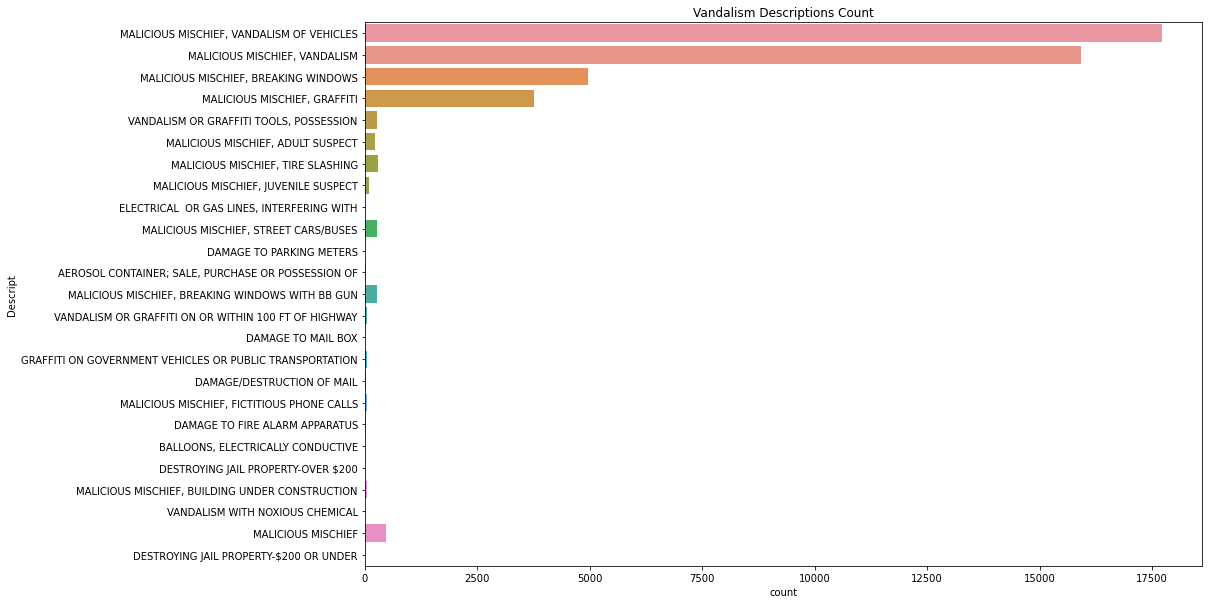

In [25]:
fig, count = plt.subplots(figsize = (15,10))
count = sns.countplot(y = vandalism['Descript'])
count.set_title('Vandalism Descriptions Count')

In [26]:
non_criminal = train_reduced_categories.loc[train_reduced_categories['Category'] == 'NON-CRIMINAL']
non_criminal

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
14,2015-05-13 22:00:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,BAYVIEW,NONE,200 Block of WILLIAMS AV,-122.397744,37.729935
15,2015-05-13 22:00:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,BAYVIEW,NONE,0 Block of MENDELL ST,-122.383692,37.743189
19,2015-05-13 21:30:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556
23,2015-05-13 21:11:00,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Wednesday,TENDERLOIN,NONE,100 Block of JONES ST,-122.412250,37.782556
25,2015-05-13 21:00:00,NON-CRIMINAL,LOST PROPERTY,Wednesday,TENDERLOIN,NONE,300 Block of OFARRELL ST,-122.410509,37.786043
...,...,...,...,...,...,...,...,...,...
877927,2003-01-06 10:40:00,NON-CRIMINAL,FOUND PROPERTY,Monday,TARAVAL,NONE,45TH AV / PACHECO ST,-122.504071,37.749281
877939,2003-01-06 10:15:00,NON-CRIMINAL,FOUND PROPERTY,Monday,INGLESIDE,NONE,100 Block of PEABODY ST,-122.407445,37.710393
877955,2003-01-06 09:27:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Monday,SOUTHERN,NONE,100 Block of BLUXOME ST,-122.399064,37.775012
877976,2003-01-06 08:29:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Monday,CENTRAL,PSYCHOPATHIC CASE,400 Block of BROADWAY ST,-122.405065,37.798013


In [27]:
non_criminal['Descript'].value_counts()

LOST PROPERTY                                         31498
AIDED CASE, MENTAL DISTURBED                          21488
FOUND PROPERTY                                        12078
AIDED CASE                                             5417
DEATH REPORT, CAUSE UNKNOWN                            4206
CASE CLOSURE                                           2257
STAY AWAY OR COURT ORDER, NON-DV RELATED               1653
AIDED CASE, DOG BITE                                   1336
CIVIL SIDEWALKS, CITATION                              1198
PROPERTY FOR IDENTIFICATION                            1196
AIDED CASE, INJURED PERSON                             1060
DEATH REPORT, NATURAL CAUSES                           1011
CIVIL SIDEWALKS, WARNING                                902
COURTESY REPORT                                         870
FIRE REPORT                                             794
AIDED CASE -PROPERTY FOR DESTRUCTION                    744
LOCATED PROPERTY                        

Text(0.5, 1.0, 'Non-Criminal Events Descriptions Count')

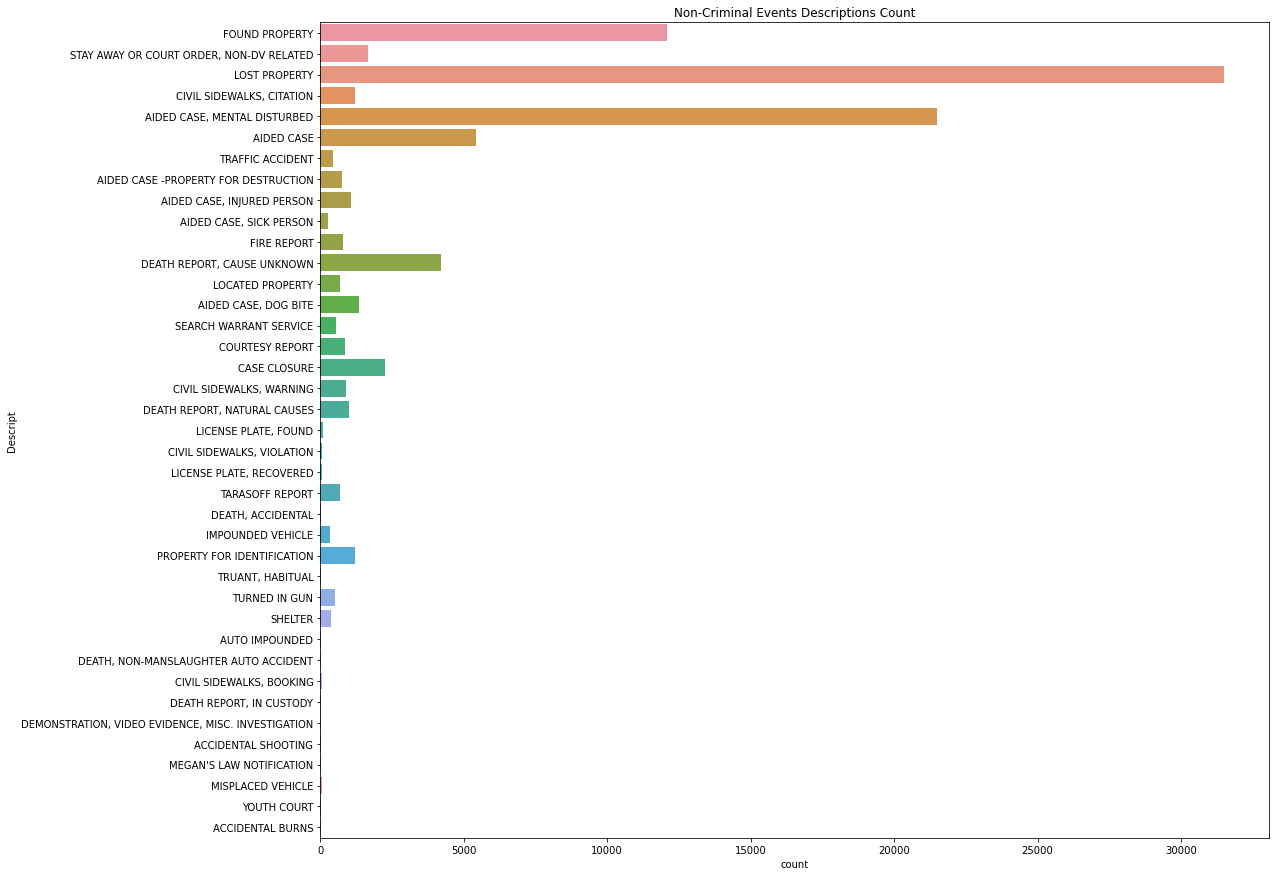

In [28]:
fig, count = plt.subplots(figsize = (17,15))
count = sns.countplot(y = non_criminal['Descript'])
count.set_title('Non-Criminal Events Descriptions Count')

In [29]:
assault = train_reduced_categories.loc[train_reduced_categories['Category'] == 'ASSAULT']
assault

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
17,2015-05-13 21:55:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Wednesday,INGLESIDE,NONE,GODEUS ST / MISSION ST,-122.421682,37.742822
51,2015-05-13 19:33:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Wednesday,BAYVIEW,NONE,23RD ST / WISCONSIN ST,-122.398696,37.754746
109,2015-05-13 17:47:00,ASSAULT,CHILD ABUSE (PHYSICAL),Wednesday,BAYVIEW,NONE,0 Block of WHITFIELD CT,-122.381838,37.731104
114,2015-05-13 17:40:00,ASSAULT,THREATS AGAINST LIFE,Wednesday,CENTRAL,NONE,1400 Block of STOCKTON ST,-122.409032,37.799253
165,2015-05-13 15:40:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Wednesday,PARK,NONE,1700 Block of MCALLISTER ST,-122.440880,37.777532
...,...,...,...,...,...,...,...,...,...
878028,2003-01-06 02:00:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Monday,SOUTHERN,NONE,6TH ST / MARKET ST,-122.410294,37.782231
878031,2003-01-06 01:50:00,ASSAULT,BATTERY,Monday,BAYVIEW,NONE,3RD ST / NEWCOMB AV,-122.390417,37.735593
878035,2003-01-06 00:55:00,ASSAULT,BATTERY,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030
878040,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685


In [30]:
assault['Descript'].unique()

array(['AGGRAVATED ASSAULT WITH BODILY FORCE', 'CHILD ABUSE (PHYSICAL)',
       'THREATS AGAINST LIFE',
       'BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP',
       'SHOOTING INTO INHABITED DWELLING OR OCCUPIED VEHICLE', 'BATTERY',
       'AGGRAVATED ASSAULT WITH A DEADLY WEAPON',
       'AGGRAVATED ASSAULT WITH A KNIFE', 'INFLICT INJURY ON COHABITEE',
       'ASSAULT WITH CAUSTIC CHEMICALS', 'AGGRAVATED ASSAULT WITH A GUN',
       'ASSAULT, AGGRAVATED, W/ GUN',
       'ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEMENT OR THEFT)',
       'TRESPASS WITHIN 30 DAYS OF CREDIBLE THREAT',
       'BATTERY OF A POLICE OFFICER', 'ATTEMPTED HOMICIDE WITH A GUN',
       'FALSE IMPRISONMENT', 'ASSAULT',
       'ATTEMPTED HOMICIDE WITH BODILY FORCE',
       'THREATENING PHONE CALL(S)',
       'FIREARM, DISCHARGING AT OCCUPIED BLDG, VEHICLE, OR AIRCRAFT',
       'ATTEMPTED HOMICIDE WITH A KNIFE',
       'THREAT OR FORCE TO RESIST EXECUTIVE OFFICER',
       'THREATS TO SCHOOL TEACHERS',
       'ATTE

In [16]:
train_reduced_categories.loc[train_reduced_categories['Category'].isin(['LARCENY/THEFT', 'VEHICLE THEFT']), 'Category'] = 'THEFT'
train_reduced_categories['Category']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0               WARRANTS
1         OTHER OFFENSES
2         OTHER OFFENSES
3                  THEFT
4                  THEFT
               ...      
878042           ASSAULT
878043    OTHER OFFENSES
878045             THEFT
878046             THEFT
878047         VANDALISM
Name: Category, Length: 699961, dtype: object

Text(0.5, 1.0, 'Most common types of crimes')

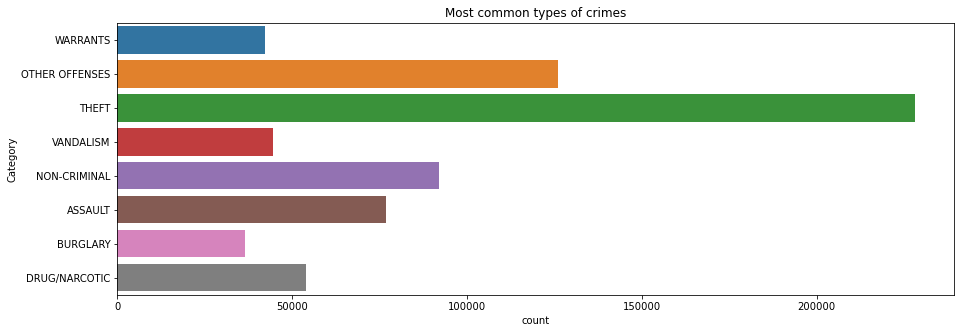

In [17]:
fig, count = plt.subplots(figsize = (15,5))
count = sns.countplot(y = train_reduced_categories['Category'])
count.set_title('Most common types of crimes')

In [33]:
train_clean = train_reduced_categories

Text(0.5, 1.0, 'Districts Count')

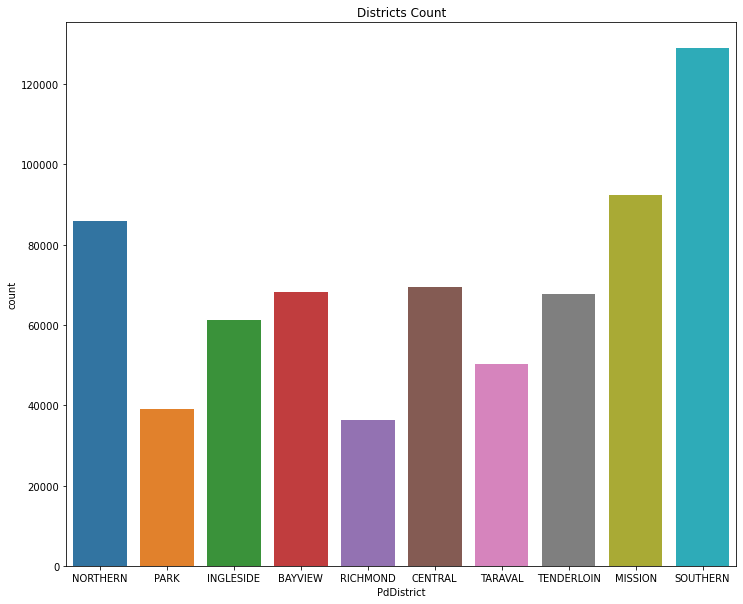

In [34]:
fig, count = plt.subplots(figsize = (12,10))
count = sns.countplot(x = train_clean['PdDistrict'])
count.set_title('Districts Count')

In [35]:
ct_district_cat = pd.crosstab(train_clean['Category'], train_clean['PdDistrict'])
ct_district_cat

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ASSAULT,9845,6971,8522,11146,8312,3512,3198,12175,5460,7674
BURGLARY,3914,4499,3327,3736,5827,2875,2683,4796,3459,1484
DRUG/NARCOTIC,4496,1805,2372,8750,4508,2570,999,9222,1529,17668
NON-CRIMINAL,6083,10923,6846,12344,10206,5886,5733,19548,6910,7436
OTHER OFFENSES,17030,8893,13176,19308,12226,6180,5619,21245,8599,13684
THEFT,17274,29181,19157,25335,34852,13073,13959,46382,17940,10873
VANDALISM,5344,4451,5363,5273,5397,2603,3155,6533,4850,1612
WARRANTS,4319,2776,2522,6605,4592,2308,1008,9083,1613,7319


Text(0.5, 1.0, 'Categories Count per District')

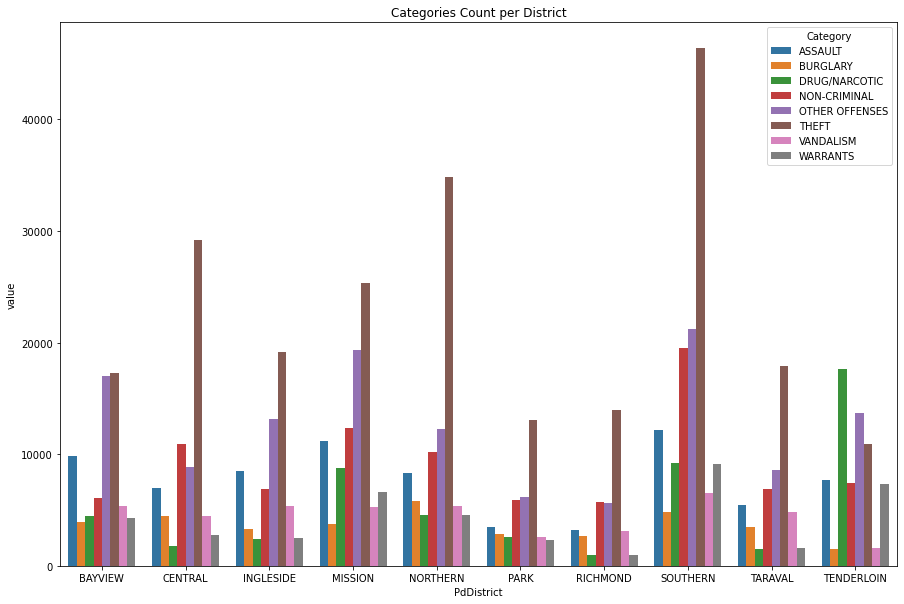

In [36]:
stacked = ct_district_cat.stack().reset_index().rename(columns={0:'value'})
fig, bar = plt.subplots(figsize = (15,10))
bar = sns.barplot(x=stacked['PdDistrict'], y=stacked['value'], hue=stacked['Category'])
bar.set_title('Categories Count per District')

Text(0.5, 1.0, 'Categories vs Districts')

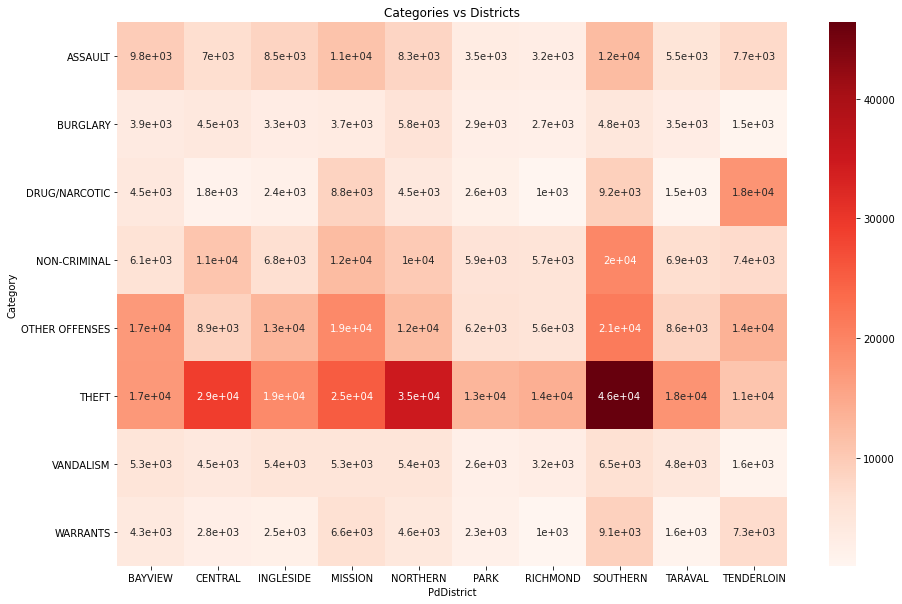

In [37]:
fig, heatmap = plt.subplots(figsize = (15,10))
heatmap = sns.heatmap(ct_district_cat, annot=True, cmap='Reds')
heatmap.set_title('Categories vs Districts')

In [38]:
sorted_days = {'Saturday': 0, 'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6}

Text(0.5, 1.0, 'Assault Crimes over the week')

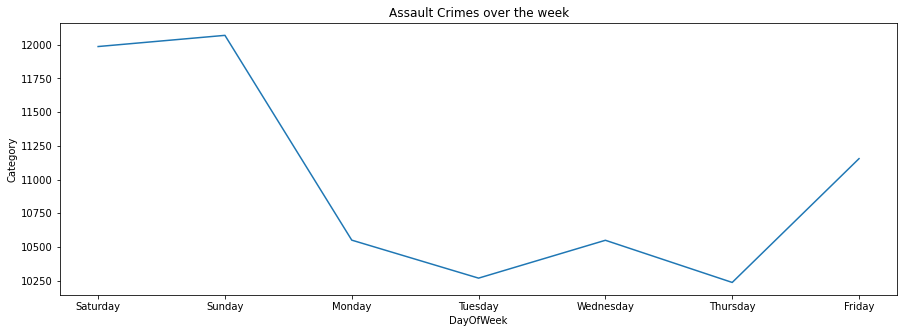

In [39]:
data = pd.DataFrame(train_clean[train_clean['Category'] == 'ASSAULT'].groupby(by=['DayOfWeek'])['Category'].count()).reset_index()
fig, line = plt.subplots(figsize = (15,5))
data['SortedDayOfWeek'] = data['DayOfWeek'].map(sorted_days)
data = data.sort_values('SortedDayOfWeek').drop('SortedDayOfWeek', axis=1)
line = sns.lineplot(x = data['DayOfWeek'], y=data['Category'])
line.set_title('Assault Crimes over the week')

Text(0.5, 1.0, 'Burglary Crimes over the week')

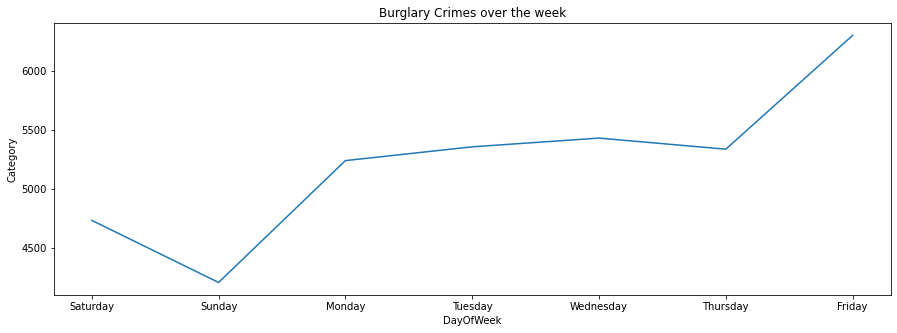

In [40]:
data = pd.DataFrame(train_clean[train_clean['Category'] == 'BURGLARY'].groupby(by=['DayOfWeek'])['Category'].count()).reset_index()
fig, line = plt.subplots(figsize = (15,5))
data['SortedDayOfWeek'] = data['DayOfWeek'].map(sorted_days)
data = data.sort_values('SortedDayOfWeek').drop('SortedDayOfWeek', axis=1)
line = sns.lineplot(x = data['DayOfWeek'], y=data['Category'])
line.set_title('Burglary Crimes over the week')

Text(0.5, 1.0, 'Drug Crimes over the week')

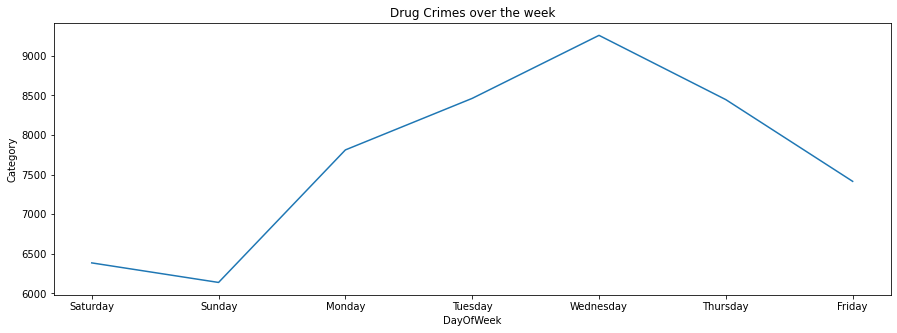

In [41]:
data = pd.DataFrame(train_clean[train_clean['Category'] == 'DRUG/NARCOTIC'].groupby(by=['DayOfWeek'])['Category'].count()).reset_index()
fig, line = plt.subplots(figsize = (15,5))
data['SortedDayOfWeek'] = data['DayOfWeek'].map(sorted_days)
data = data.sort_values('SortedDayOfWeek').drop('SortedDayOfWeek', axis=1)
line = sns.lineplot(x = data['DayOfWeek'], y=data['Category'])
line.set_title('Drug Crimes over the week')

Text(0.5, 1.0, 'Theft Crimes over the week')

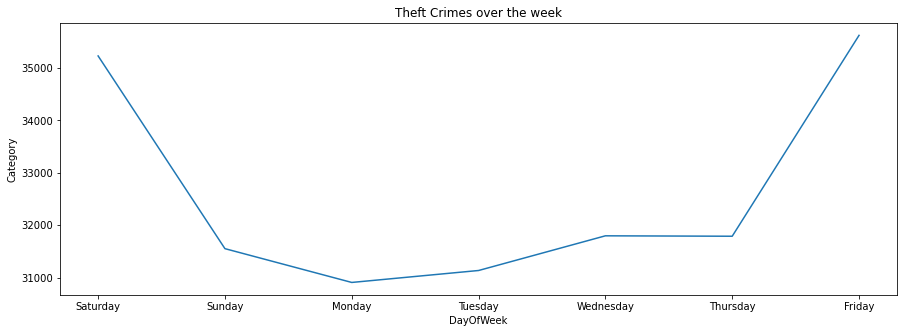

In [42]:
data = pd.DataFrame(train_clean[train_clean['Category'] == 'THEFT'].groupby(by=['DayOfWeek'])['Category'].count()).reset_index()
fig, line = plt.subplots(figsize = (15,5))
data['SortedDayOfWeek'] = data['DayOfWeek'].map(sorted_days)
data = data.sort_values('SortedDayOfWeek').drop('SortedDayOfWeek', axis=1)
line = sns.lineplot(x = data['DayOfWeek'], y=data['Category'])
line.set_title('Theft Crimes over the week')

Text(0.5, 1.0, 'Vandalism Crimes over the week')

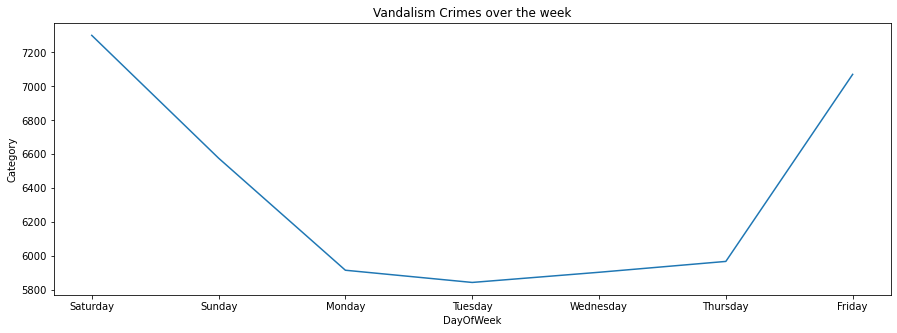

In [43]:
data = pd.DataFrame(train_clean[train_clean['Category'] == 'VANDALISM'].groupby(by=['DayOfWeek'])['Category'].count()).reset_index()
fig, line = plt.subplots(figsize = (15,5))
data['SortedDayOfWeek'] = data['DayOfWeek'].map(sorted_days)
data = data.sort_values('SortedDayOfWeek').drop('SortedDayOfWeek', axis=1)
line = sns.lineplot(x = data['DayOfWeek'], y=data['Category'])
line.set_title('Vandalism Crimes over the week')

Text(0.5, 1.0, 'Warrants issued over the week')

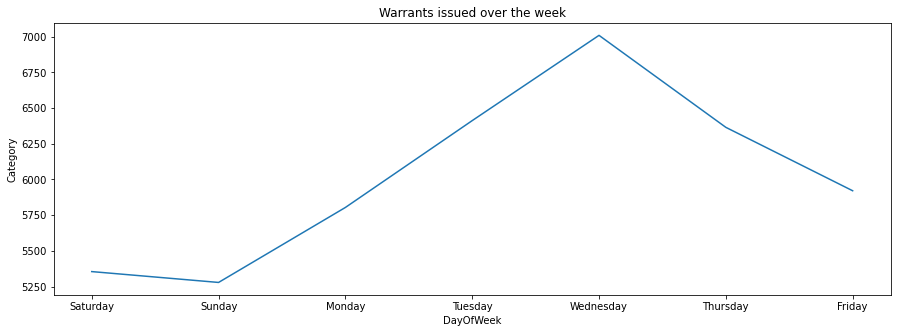

In [44]:
data = pd.DataFrame(train_clean[train_clean['Category'] == 'WARRANTS'].groupby(by=['DayOfWeek'])['Category'].count()).reset_index()
fig, line = plt.subplots(figsize = (15,5))
data['SortedDayOfWeek'] = data['DayOfWeek'].map(sorted_days)
data = data.sort_values('SortedDayOfWeek').drop('SortedDayOfWeek', axis=1)
line = sns.lineplot(x = data['DayOfWeek'], y=data['Category'])
line.set_title('Warrants issued over the week')

In [45]:
train_clean["Dates"] = pd.to_datetime(train_clean["Dates"], format="%Y-%m-%d %H:%M:%S")
train_clean["Dates"]

<ipython-input-45-2024d87eaec1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean["Dates"] = pd.to_datetime(train_clean["Dates"], format="%Y-%m-%d %H:%M:%S")


0        2015-05-13 23:53:00
1        2015-05-13 23:53:00
2        2015-05-13 23:33:00
3        2015-05-13 23:30:00
4        2015-05-13 23:30:00
                 ...        
878042   2003-01-06 00:20:00
878043   2003-01-06 00:20:00
878045   2003-01-06 00:01:00
878046   2003-01-06 00:01:00
878047   2003-01-06 00:01:00
Name: Dates, Length: 699961, dtype: datetime64[ns]

In [46]:
train_clean['Year'] = train_clean['Dates'].map(lambda x: x.year)
train_clean['Month'] = train_clean['Dates'].map(lambda x: x.month)
train_clean['Day'] = train_clean['Dates'].map(lambda x: x.day)
train_clean['Hour'] = train_clean['Dates'].map(lambda x: x.hour)
train_clean['minute'] = train_clean['Dates'].map(lambda x: x.minute)
train_clean

<ipython-input-46-b6945feb4581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Year'] = train_clean['Dates'].map(lambda x: x.year)
<ipython-input-46-b6945feb4581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Month'] = train_clean['Dates'].map(lambda x: x.month)
<ipython-input-46-b6945feb4581>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,6,0,20
878043,2003-01-06 00:20:00,OTHER OFFENSES,PAROLE VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,6,0,20
878045,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1
878046,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1


In [47]:
data = pd.DataFrame(train_clean.groupby('Year')['Category'].count())
data.reset_index(inplace=True)
data

,Year,Category
0,2003,59891
1,2004,59768
2,2005,57697
3,2006,55119
4,2007,53063
5,2008,55016
6,2009,54439
7,2010,51844
8,2011,51798
9,2012,56769


In [48]:
train_clean['Dates'].max()

Timestamp('2015-05-13 23:53:00')

In [49]:
data.drop(12, axis='rows', inplace=True)
data

,Year,Category
0,2003,59891
1,2004,59768
2,2005,57697
3,2006,55119
4,2007,53063
5,2008,55016
6,2009,54439
7,2010,51844
8,2011,51798
9,2012,56769


Text(0.5, 1.0, 'Crimes recorded over the years')

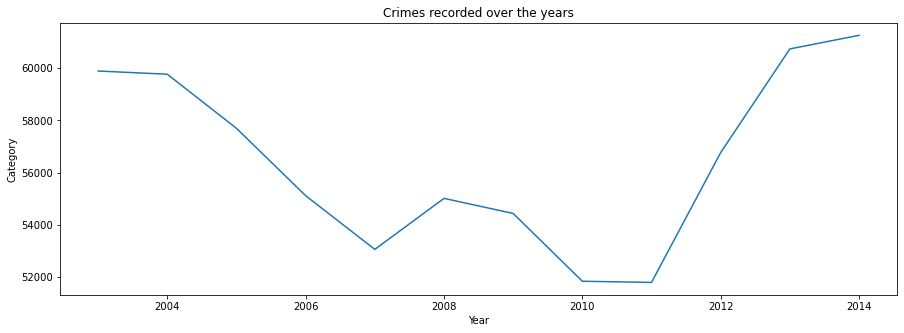

In [50]:
fig, line = plt.subplots(figsize = (15,5))
line = sns.lineplot(x = data['Year'], y=data['Category'])
line.set_title('Crimes recorded over the years')

In [51]:
ct_year_cat = pd.crosstab(train_clean['Year'], train_clean['Category'])
ct_year_cat

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,NON-CRIMINAL,OTHER OFFENSES,THEFT,VANDALISM,WARRANTS
Year,,,,,,,,
2003,6553,2999,4873,6548,10595,20545,3259,4519
2004,6460,3321,4865,6840,10284,20853,3173,3972
2005,5771,3451,4374,6922,8837,21471,3463,3408
2006,6362,3536,4694,6584,9350,17465,3877,3251
2007,6100,2645,5212,6237,9743,15964,3682,3480
2008,6323,2791,5863,5995,11845,15730,3568,2901
2009,5965,2615,5945,6162,12029,15066,3767,2890
2010,6119,2482,4481,6908,10445,14357,3988,3064
2011,6113,2509,3371,7656,9931,15401,3561,3256


Text(0.5, 1.0, 'Different crimes recorded over the years')

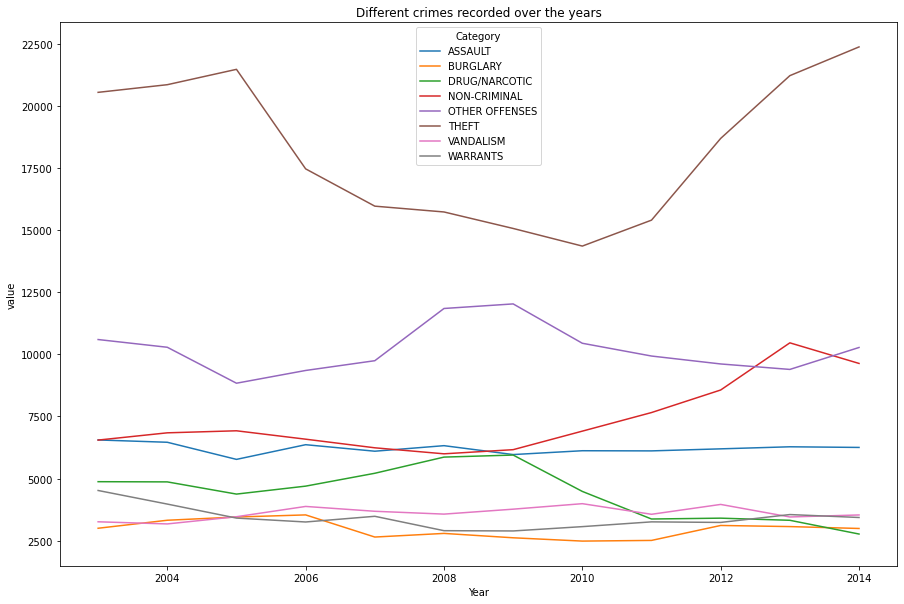

In [52]:
stacked = ct_year_cat.stack().reset_index().rename(columns={0:'value'})
filt = stacked['Year'] != 2015
stacked = stacked[filt]
fig, count = plt.subplots(figsize = (15,10))
line = sns.lineplot(x=stacked['Year'], y=stacked['value'], hue=stacked['Category'])
line.set_title('Different crimes recorded over the years')

In [53]:
def get_time_periods(hour):
    if hour >= 2 and hour < 8:
        return 'Dawn'
    elif hour >= 8 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 16:
        return 'Afternoon'
    elif hour >= 16 and hour < 20:
        return 'Evening'
    elif hour >= 20 and hour < 23:
        return 'Night'
    else:
        return 'Late Night'

In [54]:
train_clean['Day Period'] = train_clean['Hour'].map(get_time_periods)
train_clean['Day Period'].value_counts()

<ipython-input-54-4e377f6c1ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Day Period'] = train_clean['Hour'].map(get_time_periods)


Evening       172297
Afternoon     149069
Morning       114401
Night         109372
Late Night     87127
Dawn           67695
Name: Day Period, dtype: int64

Text(0.5, 0, 'Day Period')

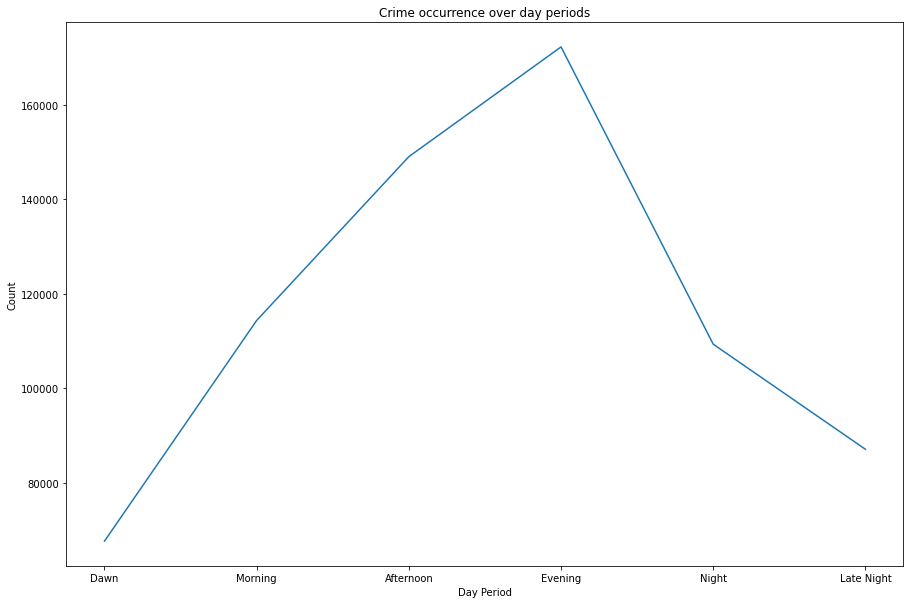

In [55]:
data = pd.DataFrame(train_clean['Day Period'].value_counts()).reset_index()
fig, count = plt.subplots(figsize = (15,10))

sorted_periods = {'Dawn': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late Night': 5}
data['Day Period Value'] = data['index'].map(sorted_periods)
data = data.sort_values('Day Period Value').drop('Day Period Value',axis=1)

line = sns.lineplot(x=data['index'], y=data['Day Period'])
line.set_title('Crime occurrence over day periods')
line.set_ylabel('Count')
line.set_xlabel('Day Period')

In [56]:
ct_period_cat = pd.crosstab(train_clean['Category'], train_clean['Day Period'])
ct_period_cat

Day Period,Afternoon,Dawn,Evening,Late Night,Morning,Night
Category,,,,,,
ASSAULT,15673,9679,16113,11717,11936,11697
BURGLARY,6759,5274,9062,3618,7157,4730
DRUG/NARCOTIC,14081,3847,14742,5021,8995,7233
NON-CRIMINAL,22858,9096,19779,10151,18267,11764
OTHER OFFENSES,27115,12876,28332,17415,22883,17339
THEFT,46590,16464,63429,27132,32296,42115
VANDALISM,6382,5783,10737,7319,5301,9059
WARRANTS,9611,4676,10103,4754,7566,5435


Text(0.5, 1.0, 'Crime occurrence over day periods')

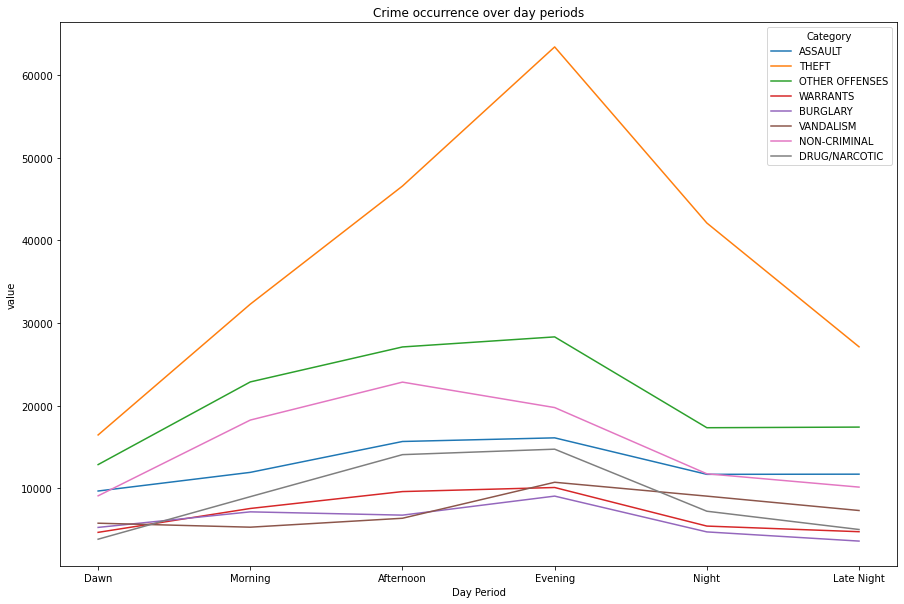

In [57]:
stacked = ct_period_cat.stack().reset_index().rename(columns={0:'value'})
sorted_periods = {'Dawn': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late Night': 5}
stacked['Day Period Value'] = stacked['Day Period'].map(sorted_periods)
stacked = stacked.sort_values('Day Period Value').drop('Day Period Value',axis=1)

fig, count = plt.subplots(figsize = (15,10))
line = sns.lineplot(x=stacked['Day Period'], y=stacked['value'], hue=stacked['Category'])
line.set_title('Crime occurrence over day periods')

In [58]:
cal = calendar()
holidays = cal.holidays(start=train_clean['Dates'].min(), end=train_clean['Dates'].max())
train_clean['Holiday'] = train_clean['Dates'].dt.date.astype('datetime64').isin(holidays)
train_clean['Holiday'].value_counts()

<ipython-input-58-8f84cd4a81a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Holiday'] = train_clean['Dates'].dt.date.astype('datetime64').isin(holidays)


False    679243
True      20718
Name: Holiday, dtype: int64

In [59]:
ct_holiday_cat = pd.crosstab(train_clean['Category'], train_clean['Holiday'])
ct_holiday_cat

Holiday,False,True
Category,,
ASSAULT,74521,2294
BURGLARY,35555,1045
DRUG/NARCOTIC,52245,1674
NON-CRIMINAL,89165,2750
OTHER OFFENSES,122174,3786
THEFT,221489,6537
VANDALISM,43266,1315
WARRANTS,40828,1317


In [60]:
stacked = ct_holiday_cat.stack().reset_index().rename(columns={0:'value'})
stacked.loc[stacked['Holiday'] == False, 'value'] /= train_clean.loc[train_clean['Holiday'] == False, 'Holiday'].count()
stacked.loc[stacked['Holiday'] == True, 'value'] /= train_clean.loc[train_clean['Holiday'] == True, 'Holiday'].count()
stacked

,Category,Holiday,value
0,ASSAULT,False,0.109712
1,ASSAULT,True,0.110725
2,BURGLARY,False,0.052345
3,BURGLARY,True,0.050439
4,DRUG/NARCOTIC,False,0.076917
5,DRUG/NARCOTIC,True,0.080799
6,NON-CRIMINAL,False,0.131271
7,NON-CRIMINAL,True,0.132735
8,OTHER OFFENSES,False,0.179868
9,OTHER OFFENSES,True,0.182740


Text(0.5, 1.0, 'Proportions of crimes during regular days vs holidays')

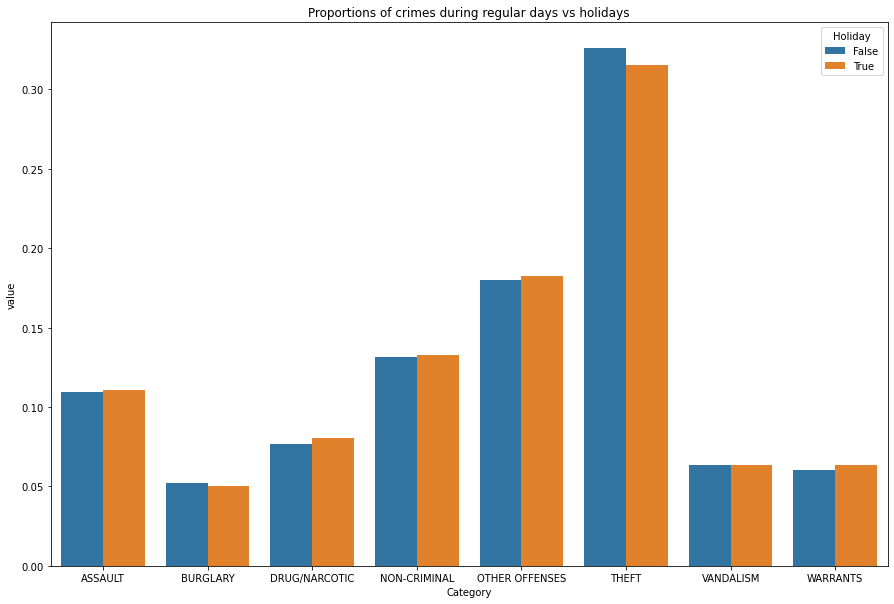

In [61]:
fig, count = plt.subplots(figsize = (15,10))
bar = sns.barplot(x=stacked['Category'], y=stacked['value'], hue=stacked['Holiday'])
bar.set_title('Proportions of crimes during regular days vs holidays')

In [62]:
def business_hours(hours):
    return 8 <= hours <= 18

In [63]:
train_clean['Business Hours'] = train_clean['Hour'].map(business_hours)
train_clean['Business Hours'].value_counts()

<ipython-input-63-55b1bcebd0c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Business Hours'] = train_clean['Hour'].map(business_hours)


True     394737
False    305224
Name: Business Hours, dtype: int64

In [64]:
ct_business_hrs_cat = pd.crosstab(train_clean['Category'], train_clean['Business Hours'])
ct_business_hrs_cat

Business Hours,False,True
Category,,
ASSAULT,37031,39784
BURGLARY,15547,21053
DRUG/NARCOTIC,19254,34665
NON-CRIMINAL,35260,56655
OTHER OFFENSES,53750,72210
THEFT,102369,125657
VANDALISM,24980,19601
WARRANTS,17033,25112


In [65]:
stacked = ct_business_hrs_cat.stack().reset_index().rename(columns={0:'value'})
stacked.loc[stacked['Business Hours'] == False, 'value'] /= train_clean.loc[train_clean['Business Hours'] == False, 'Business Hours'].count()
stacked.loc[stacked['Business Hours'] == True, 'value'] /= train_clean.loc[train_clean['Business Hours'] == True, 'Business Hours'].count()
stacked

,Category,Business Hours,value
0,ASSAULT,False,0.121324
1,ASSAULT,True,0.100786
2,BURGLARY,False,0.050936
3,BURGLARY,True,0.053334
4,DRUG/NARCOTIC,False,0.063082
5,DRUG/NARCOTIC,True,0.087818
6,NON-CRIMINAL,False,0.115522
7,NON-CRIMINAL,True,0.143526
8,OTHER OFFENSES,False,0.176100
9,OTHER OFFENSES,True,0.182932


Text(0.5, 1.0, 'Proportions of crimes in business hours vs rest of the day')

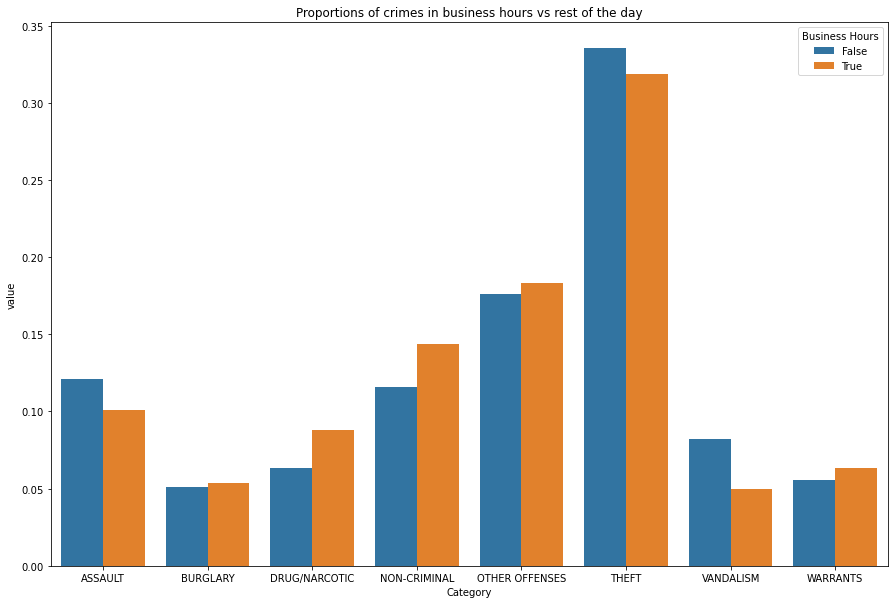

In [66]:
fig, count = plt.subplots(figsize = (15,10))
bar = sns.barplot(x=stacked['Category'], y=stacked['value'], hue=stacked['Business Hours'])
bar.set_title('Proportions of crimes in business hours vs rest of the day')

In [67]:
def year_quarter(month):
    if month >= 1 and month <= 3:
        return 'Q1'
    elif month > 3 and month <= 6:
        return 'Q2'
    elif month > 6 and month <= 9:
        return 'Q3'
    elif month > 9 and month <= 12:
        return 'Q4'

In [68]:
train_clean['Year Quarter'] = train_clean['Month'].map(year_quarter)
train_clean['Year Quarter'].value_counts()

<ipython-input-68-af6ba495b096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Year Quarter'] = train_clean['Month'].map(year_quarter)


Q2    181542
Q1    176583
Q4    173290
Q3    168546
Name: Year Quarter, dtype: int64

In [69]:
ct_yquarter_cat = pd.crosstab(train_clean['Category'], train_clean['Year Quarter'])
ct_yquarter_cat

Year Quarter,Q1,Q2,Q3,Q4
Category,,,,
ASSAULT,18997,20388,18256,19174
BURGLARY,9036,9457,8563,9544
DRUG/NARCOTIC,14694,13691,12859,12675
NON-CRIMINAL,22608,24439,22184,22684
OTHER OFFENSES,33701,32578,29536,30145
THEFT,55319,58322,56415,57970
VANDALISM,10854,11739,10708,11280
WARRANTS,11374,10928,10025,9818


Text(0.5, 1.0, 'Crime occurrences per quarter year')

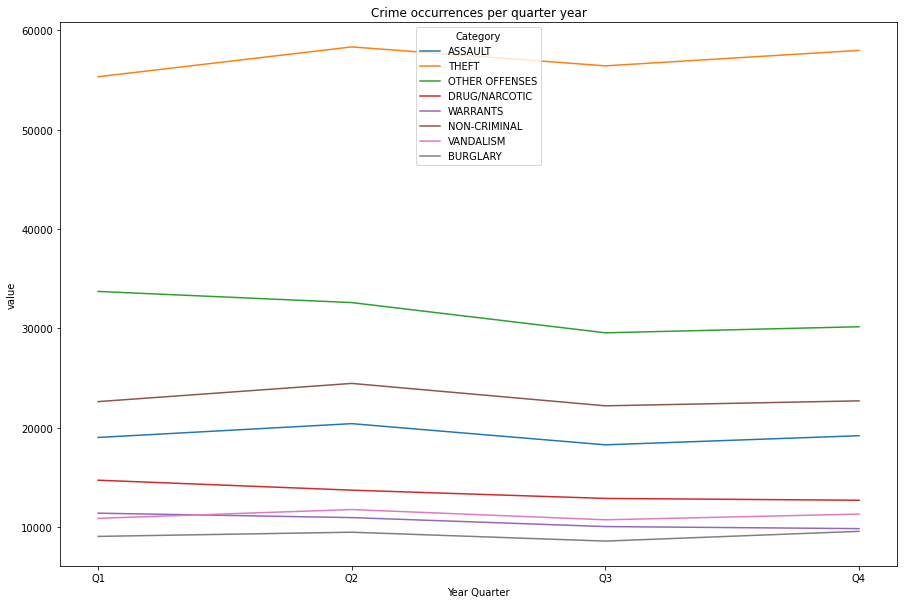

In [70]:
stacked = ct_yquarter_cat.stack().reset_index().rename(columns={0:'value'})
fig, line = plt.subplots(figsize = (15,10))

sorted_quarters = {'Q1': 0, 'Q2': 1, 'Q3': 2, 'Q4': 3}
stacked['Quarter Value'] = stacked['Year Quarter'].map(sorted_quarters)
stacked = stacked.sort_values('Quarter Value').drop('Quarter Value',axis=1)

line = sns.lineplot(x=stacked['Year Quarter'], y=stacked['value'], hue=stacked['Category'])
line.set_title('Crime occurrences per quarter year')

In [71]:
def weekend(weekday):
    if weekday == "Saturday" or weekday == "Sunday":
        return True
    else:
        return False

In [72]:
train_clean['Weekend'] = train_clean['DayOfWeek'].map(weekend)
train_clean['Weekend'].value_counts()

<ipython-input-72-4d3b3a219e46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Weekend'] = train_clean['DayOfWeek'].map(weekend)


False    503760
True     196201
Name: Weekend, dtype: int64

In [73]:
ct_weekend_cat = pd.crosstab(train_clean['Category'], train_clean['Weekend'])
ct_weekend_cat

Weekend,False,True
Category,,
ASSAULT,52758,24057
BURGLARY,27663,8937
DRUG/NARCOTIC,41396,12523
NON-CRIMINAL,65066,26849
OTHER OFFENSES,93417,32543
THEFT,161246,66780
VANDALISM,30703,13878
WARRANTS,31511,10634


In [74]:
stacked = ct_weekend_cat.stack().reset_index().rename(columns={0:'value'})
stacked.loc[stacked['Weekend'] == False, 'value'] /= train_clean.loc[train_clean['Weekend'] == False, 'Weekend'].count()
stacked.loc[stacked['Weekend'] == True, 'value'] /= train_clean.loc[train_clean['Weekend'] == True, 'Weekend'].count()
stacked

,Category,Weekend,value
0,ASSAULT,False,0.104728
1,ASSAULT,True,0.122614
2,BURGLARY,False,0.054913
3,BURGLARY,True,0.045550
4,DRUG/NARCOTIC,False,0.082174
5,DRUG/NARCOTIC,True,0.063827
6,NON-CRIMINAL,False,0.129161
7,NON-CRIMINAL,True,0.136844
8,OTHER OFFENSES,False,0.185439
9,OTHER OFFENSES,True,0.165866


Text(0.5, 1.0, 'Crime proportions on weekends vs normal days')

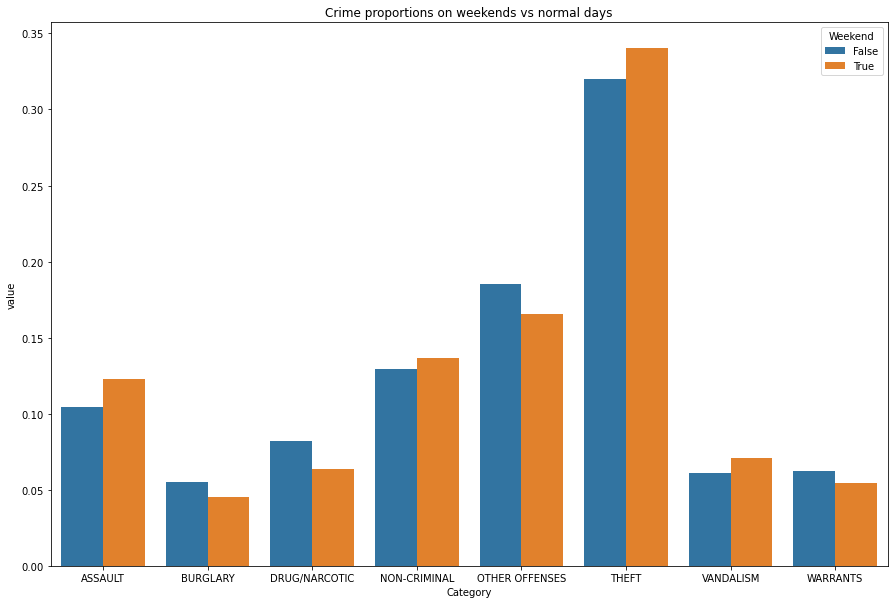

In [75]:
fig, count = plt.subplots(figsize = (15,10))
bar = sns.barplot(x=stacked['Category'], y=stacked['value'], hue=stacked['Weekend'])
bar.set_title('Crime proportions on weekends vs normal days')

In [76]:
train_clean

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,minute,Day Period,Holiday,Business Hours,Year Quarter,Weekend
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,Late Night,False,False,Q2,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,Late Night,False,False,Q2,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,Late Night,False,False,Q2,False
3,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,Late Night,False,False,Q2,False
4,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,Late Night,False,False,Q2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,6,0,20,Late Night,False,False,Q1,False
878043,2003-01-06 00:20:00,OTHER OFFENSES,PAROLE VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,6,0,20,Late Night,False,False,Q1,False
878045,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1,Late Night,False,False,Q1,False
878046,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1,Late Night,False,False,Q1,False


In [77]:
def third_of_month(day):
    if day >= 1 and day < 10:
        return 'T1'
    elif day >= 10 and day < 20:
        return 'T2'
    elif day >= 20 and day <= 31:
        return 'T3'
train_clean['Third_of_Month'] = train_clean['Day'].map(third_of_month)
train_clean

<ipython-input-77-c697ce9ef610>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Third_of_Month'] = train_clean['Day'].map(third_of_month)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,minute,Day Period,Holiday,Business Hours,Year Quarter,Weekend,Third_of_Month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,Late Night,False,False,Q2,False,T2
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,Late Night,False,False,Q2,False,T2
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,Late Night,False,False,Q2,False,T2
3,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,Late Night,False,False,Q2,False,T2
4,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,Late Night,False,False,Q2,False,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,6,0,20,Late Night,False,False,Q1,False,T1
878043,2003-01-06 00:20:00,OTHER OFFENSES,PAROLE VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,6,0,20,Late Night,False,False,Q1,False,T1
878045,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1,Late Night,False,False,Q1,False,T1
878046,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1,Late Night,False,False,Q1,False,T1


In [78]:
def type_of_street_extraction(Address):
    type_of_street= Address.split(' ')
    for index in range(len(type_of_street)):
        cell_value= type_of_street[index]
        if len(cell_value) == 2 and cell_value not in['of', 'OF', 'US', 'LA']:
            #ls_street_types.append(cell_value)
            return cell_value
            break

In [79]:
train_clean['street_type'] = train_clean['Address'].map(type_of_street_extraction)

<ipython-input-79-4c7872f7c957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['street_type'] = train_clean['Address'].map(type_of_street_extraction)


In [80]:
train_clean['street_type'].unique()

array(['ST', 'AV', 'WY', 'BL', 'CT', 'DR', 'HY', 'RD', 'PZ', 'PL', 'TR',
       'LN', 'JR', None, 'CR', 'AL', 'WK', 'EX', 'RW', 'EL', 'DE', 'MC',
       'GG', 'FE', 'PT', 'MT', 'LE', 'SF'], dtype=object)

In [81]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699961 entries, 0 to 878047
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Dates           699961 non-null  datetime64[ns]
 1   Category        699961 non-null  object        
 2   Descript        699961 non-null  object        
 3   DayOfWeek       699961 non-null  object        
 4   PdDistrict      699961 non-null  object        
 5   Resolution      699961 non-null  object        
 6   Address         699961 non-null  object        
 7   X               699961 non-null  float64       
 8   Y               699961 non-null  float64       
 9   Year            699961 non-null  int64         
 10  Month           699961 non-null  int64         
 11  Day             699961 non-null  int64         
 12  Hour            699961 non-null  int64         
 13  minute          699961 non-null  int64         
 14  Day Period      699961 non-null  obj

In [82]:
train_clean.dropna(inplace=True)

<ipython-input-82-844f098b487c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean.dropna(inplace=True)


In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_clean['Category_Labels'] = le.fit_transform(train_clean['Category'])
train_clean['DayOfWeek_Labels'] = le.fit_transform(train_clean['DayOfWeek'])
train_clean['PdDistrict_Labels'] = le.fit_transform(train_clean['PdDistrict'])
train_clean['Day Period'] = le.fit_transform(train_clean['Day Period'])
train_clean['Year Quarter'] = le.fit_transform(train_clean['Year Quarter'])
train_clean['street_type_Labels'] = le.fit_transform(train_clean['street_type'])
train_clean

<ipython-input-83-a59e7783ab7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Category_Labels'] = le.fit_transform(train_clean['Category'])
<ipython-input-83-a59e7783ab7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['DayOfWeek_Labels'] = le.fit_transform(train_clean['DayOfWeek'])
<ipython-input-83-a59e7783ab7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,...,Holiday,Business Hours,Year Quarter,Weekend,Third_of_Month,street_type,Category_Labels,DayOfWeek_Labels,PdDistrict_Labels,street_type_Labels
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,1,False,T2,ST,7,6,4,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,1,False,T2,ST,4,6,4,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,False,False,1,False,T2,AV,4,6,4,1
3,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,False,False,1,False,T2,ST,5,6,4,23
4,2015-05-13 23:30:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,False,False,1,False,T2,ST,5,6,5,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,...,False,False,0,False,T1,AV,0,1,0,1
878043,2003-01-06 00:20:00,OTHER OFFENSES,PAROLE VIOLATION,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,...,False,False,0,False,T1,AV,4,1,0,1
878045,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,...,False,False,0,False,T1,ST,5,1,2,23
878046,2003-01-06 00:01:00,THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,...,False,False,0,False,T1,ST,5,1,7,23


In [84]:
train_clean['Third_of_Month_Labels'] = le.fit_transform(train_clean['Third_of_Month'])

<ipython-input-84-efef126cb67e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Third_of_Month_Labels'] = le.fit_transform(train_clean['Third_of_Month'])


In [85]:
train_clean = train_clean.drop(columns = ["Third_of_Month"])

In [86]:
train_clean= train_clean.drop(columns=['Category', 'DayOfWeek','PdDistrict','Address', 'Day Period'
                                       , 'Year Quarter', 'street_type', 'Dates'])
train_clean

,Descript,Resolution,X,Y,Year,Month,Day,Hour,minute,Holiday,Business Hours,Weekend,Category_Labels,DayOfWeek_Labels,PdDistrict_Labels,street_type_Labels,Third_of_Month_Labels
0,WARRANT ARREST,"ARREST, BOOKED",-122.425892,37.774599,2015,5,13,23,53,False,False,False,7,6,4,23,1
1,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",-122.425892,37.774599,2015,5,13,23,53,False,False,False,4,6,4,23,1
2,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",-122.424363,37.800414,2015,5,13,23,33,False,False,False,4,6,4,1,1
3,GRAND THEFT FROM LOCKED AUTO,NONE,-122.426995,37.800873,2015,5,13,23,30,False,False,False,5,6,4,23,1
4,GRAND THEFT FROM LOCKED AUTO,NONE,-122.438738,37.771541,2015,5,13,23,30,False,False,False,5,6,5,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878042,ATTEMPTED HOMICIDE WITH A GUN,"ARREST, BOOKED",-122.389769,37.730564,2003,1,6,0,20,False,False,False,0,1,0,1,0
878043,PAROLE VIOLATION,"ARREST, BOOKED",-122.389769,37.730564,2003,1,6,0,20,False,False,False,4,1,0,1,0
878045,GRAND THEFT FROM LOCKED AUTO,NONE,-122.447364,37.731948,2003,1,6,0,1,False,False,False,5,1,2,23,0
878046,GRAND THEFT FROM LOCKED AUTO,NONE,-122.403390,37.780266,2003,1,6,0,1,False,False,False,5,1,7,23,0


In [87]:
train_clean= train_clean.drop(columns=['Resolution'])

In [88]:
train_clean = train_clean.drop(columns= ["Descript"])

In [89]:
train_clean

,X,Y,Year,Month,Day,Hour,minute,Holiday,Business Hours,Weekend,Category_Labels,DayOfWeek_Labels,PdDistrict_Labels,street_type_Labels,Third_of_Month_Labels
0,-122.425892,37.774599,2015,5,13,23,53,False,False,False,7,6,4,23,1
1,-122.425892,37.774599,2015,5,13,23,53,False,False,False,4,6,4,23,1
2,-122.424363,37.800414,2015,5,13,23,33,False,False,False,4,6,4,1,1
3,-122.426995,37.800873,2015,5,13,23,30,False,False,False,5,6,4,23,1
4,-122.438738,37.771541,2015,5,13,23,30,False,False,False,5,6,5,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878042,-122.389769,37.730564,2003,1,6,0,20,False,False,False,0,1,0,1,0
878043,-122.389769,37.730564,2003,1,6,0,20,False,False,False,4,1,0,1,0
878045,-122.447364,37.731948,2003,1,6,0,1,False,False,False,5,1,2,23,0
878046,-122.403390,37.780266,2003,1,6,0,1,False,False,False,5,1,7,23,0


In [90]:


train_clean['Holiday'].replace(False, 0, inplace=True)
train_clean["Holiday"].replace(True, 1, inplace = True)
train_clean["Holiday"] = train_clean["Holiday"].astype('uint8')

In [91]:
train_clean['Business Hours'].replace(False, 0, inplace=True)
train_clean["Business Hours"].replace(True, 1, inplace = True)
train_clean["Business Hours"] = train_clean["Business Hours"].astype('uint8')

train_clean['Weekend'].replace(False, 0, inplace=True)
train_clean["Weekend"].replace(True, 1, inplace = True)
train_clean["Weekend"] = train_clean["Weekend"].astype('uint8')

In [92]:
train_clean

,X,Y,Year,Month,Day,Hour,minute,Holiday,Business Hours,Weekend,Category_Labels,DayOfWeek_Labels,PdDistrict_Labels,street_type_Labels,Third_of_Month_Labels
0,-122.425892,37.774599,2015,5,13,23,53,0,0,0,7,6,4,23,1
1,-122.425892,37.774599,2015,5,13,23,53,0,0,0,4,6,4,23,1
2,-122.424363,37.800414,2015,5,13,23,33,0,0,0,4,6,4,1,1
3,-122.426995,37.800873,2015,5,13,23,30,0,0,0,5,6,4,23,1
4,-122.438738,37.771541,2015,5,13,23,30,0,0,0,5,6,5,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878042,-122.389769,37.730564,2003,1,6,0,20,0,0,0,0,1,0,1,0
878043,-122.389769,37.730564,2003,1,6,0,20,0,0,0,4,1,0,1,0
878045,-122.447364,37.731948,2003,1,6,0,1,0,0,0,5,1,2,23,0
878046,-122.403390,37.780266,2003,1,6,0,1,0,0,0,5,1,7,23,0


In [93]:
train_clean['Category_Labels'].unique()

array([7, 4, 5, 6, 3, 0, 1, 2])

In [94]:
# Set training data (drop labels) and training labels
X_train = train_clean.drop("Category_Labels", axis=1).copy()
Y_train = train_clean["Category_Labels"].copy()

In [95]:
from sklearn.model_selection import train_test_split
# Use these for ML algorithms that can handle categorical data without OHE
mini_train_data, mini_dev_data, mini_train_labels, mini_dev_labels = train_test_split(X_train, 
                                                                                      Y_train,
                                                                                      stratify=Y_train,
                                                                                      test_size=0.3,
                                                                                      random_state=1)

In [96]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Ensemble
# n_estimators; This is the number of trees you want to build before taking the maximum voting or averages of predictions.
#Higher number of trees give you better performance but makes your code slower.
random_forest = RandomForestClassifier(n_estimators=550, max_depth= 31, max_features='sqrt',
                                       min_samples_leaf=16, min_samples_split=43, 
                                       random_state=1, verbose=1, n_jobs=2)


random_forest.fit(mini_train_data, mini_train_labels)
pred_probs = random_forest.predict_proba(mini_dev_data)

rf_loss = log_loss(mini_dev_labels, pred_probs)


print('Random Forest Validation Log Loss: ', rf_loss)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.8min
[Parallel(n_jobs=2)]: Done 550 out of 550 | elapsed:  3.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    6.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   13.1s


Random Forest Validation Log Loss:  1.62630788897532


[Parallel(n_jobs=2)]: Done 550 out of 550 | elapsed:   16.1s finished
